In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Importing dataset

In [2]:
import pandas as pd

df = pd.read_csv('C:/3-Programming/Flight-Delay-Pridiction-main/flightdata.csv')
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


## Getting row and column count

In [3]:
df.shape

(11231, 26)

# Analysing Dataset

## Checking for missing values

In [4]:
df.isnull().values.any()

True

## Number of missing values in each column

In [5]:
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

# Cleaning Dataset

## Removing column

In [6]:
df = df.drop('Unnamed: 25', axis=1)
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,0.0,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,0.0,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,0.0,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,0.0,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,0.0,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0


## Filtering DataFrame

In [7]:
df = df[["MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_DEP_TIME", "ARR_DEL15"]]
df.isnull().sum()

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_DEP_TIME      0
ARR_DEL15       188
dtype: int64

# Preparing dataset for machine learning model

## Rows with missing values

In [8]:
df[df.isnull().values].head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,NaN
179,1,10,7,MSP,DTW,1348,NaN
184,1,10,7,MSP,DTW,625,NaN
210,1,10,7,DTW,MSP,1200,NaN
478,1,22,5,SEA,JFK,2305,NaN


## Replacing NaNs with 1s

In [9]:
df = df.fillna({'ARR_DEL15': 1})
df.iloc[177:185]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,1.0
178,1,9,6,DTW,JFK,1527,0.0
179,1,10,7,MSP,DTW,1348,1.0
180,1,10,7,DTW,MSP,1540,0.0
181,1,10,7,JFK,ATL,1325,0.0
182,1,10,7,JFK,ATL,610,0.0
183,1,10,7,JFK,SEA,1615,0.0
184,1,10,7,MSP,DTW,625,1.0


## DataFrame with unbinned departure times

In [10]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,1905,0.0
1,1,1,5,DTW,MSP,1345,0.0
2,1,1,5,ATL,SEA,940,0.0
3,1,1,5,SEA,MSP,819,0.0
4,1,1,5,SEA,DTW,2300,0.0


## DataFrame with binned departure times

In [11]:
import math

df.CRS_DEP_TIME = df.CRS_DEP_TIME.apply(lambda x: int(math.floor(x)*0.001))
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,1,0.0
1,1,1,5,DTW,MSP,1,0.0
2,1,1,5,ATL,SEA,0,0.0
3,1,1,5,SEA,MSP,0,0.0
4,1,1,5,SEA,DTW,2,0.0


## DataFrame with indicator columns from the ORIGN and DEST column

In [12]:
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,1,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,1,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,0,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,0,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,2,0.0,0,0,0,0,1,0,1,0,0,0


## Splitting the dataset

In [13]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop('ARR_DEL15', axis=1), df['ARR_DEL15'], test_size=0.2, random_state=42)
df.head

<bound method NDFrame.head of        MONTH  DAY_OF_MONTH  DAY_OF_WEEK  CRS_DEP_TIME  ARR_DEL15  ORIGIN_ATL  \
0          1             1            5             1        0.0           1   
1          1             1            5             1        0.0           0   
2          1             1            5             0        0.0           1   
3          1             1            5             0        0.0           0   
4          1             1            5             2        0.0           0   
...      ...           ...          ...           ...        ...         ...   
11226     12            30            5             1        0.0           0   
11227     12            30            5             1        0.0           0   
11228     12            30            5             1        0.0           0   
11229     12            30            5             1        0.0           1   
11230     12            30            5             0        0.0           1   

       OR

## Displaying the number of rows and columns in the DataFrame containing the feature columns used for training 

In [14]:
train_x.shape

(8984, 14)

## Displaying the number of rows and columns in the DataFrame containing the feature columns used for testing 

In [15]:
test_x.shape

(2247, 14)

# Building a Machine Learning Model

## Creating a RandomForestClassifer object and training it by calling the fit method

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=12)
model.fit(train_x, train_y)

RandomForestClassifier(random_state=12)

## Calling predict to test the model and score to determine the accuracy 

In [17]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.8549176680017802

## Finding probabilities that a flight will arrive on time or not 

In [18]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)
print (probabilities)

[[1.         0.        ]
 [0.96       0.04      ]
 [0.91083333 0.08916667]
 ...
 [0.93516667 0.06483333]
 [0.99       0.01      ]
 [1.         0.        ]]


# Checking accuracy of our Model

## Finding how often the model will make a correct prediction regardless of the outcome

In [19]:
roc_auc_score(test_y,probabilities[:, 1])

0.6951374863809093

## Generating a confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[1847,   89],
       [ 237,   74]], dtype=int64)

## Measuring precision 

In [21]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.93488824101069

## Measuring recall

In [22]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.768370607028754

# Plotting ROC curve for visualization

## imporing libraries for visualization

In [23]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set()

## Plotting ROC curve

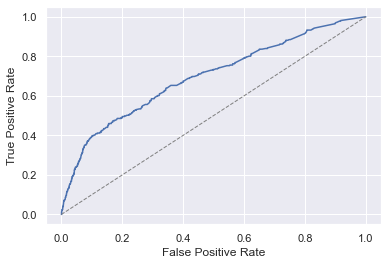

In [24]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y,probabilities[:, 1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='grey',lw=1,LineStyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Creating a function for prediction of delay

## Function to check if the flight will be on time or not 

In [25]:
def predict_delay(departure_date_time, origin, destination):
    from datetime import datetime
    
    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour

    origin = origin.upper()
    destination = destination.upper()

    input = [{'MONTH': month,
              'DAY': day,
              'DAY_OF_WEEK': day_of_week,
              'CRS_DEP_TIME': hour,
              'ORIGIN_ATL': 1 if origin == 'ATL' else 0,
              'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
              'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
              'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
              'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
              'DEST_ATL': 1 if destination == 'ATL' else 0,
              'DEST_DTW': 1 if destination == 'DTW' else 0,
              'DEST_JFK': 1 if destination == 'JFK' else 0,
              'DEST_MSP': 1 if destination == 'MSP' else 0,
              'DEST_SEA': 1 if destination == 'SEA' else 0 }]

    return model.predict_proba(pd.DataFrame(input))[0][0]

# Using our function to predict delay

## Predicting whether a flight will arrive on time

In [26]:
predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL')

0.7016666666666665

## Checking for the same flight on next day

In [27]:
predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL')

0.929

## Checking for the morning flight

In [28]:
predict_delay('2/10/2018 10:00:00', 'ATL', 'SEA')

0.965

# Using graph to show our prediction

## Probability of on-time arrivals for an evening flight from JFK to ATL over a range of days

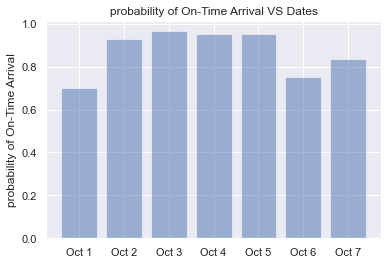

In [29]:
import numpy as np

labels = ('Oct 1', 'Oct 2', 'Oct 3', 'Oct 4', 'Oct 5', 'Oct 6', 'Oct 7')
values = (predict_delay('01/10/2018' ' 21:45:00', 'JFK', 'ATL'),
          predict_delay('02/10/2018' ' 21:45:00', 'JFK', 'ATL'),
          predict_delay('03/10/2018' ' 21:45:00', 'JFK', 'ATL'),
          predict_delay('04/10/2018' ' 21:45:00', 'JFK', 'ATL'),
          predict_delay('05/10/2018' ' 21:45:00', 'JFK', 'ATL'),
          predict_delay('06/10/2018' ' 21:45:00', 'JFK', 'ATL'),
          predict_delay('07/10/2018' ' 21:45:00', 'JFK', 'ATL'),)
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha = 0.5)
plt.xticks(alabels, labels)
plt.ylabel('probability of On-Time Arrival')
plt.title('probability of On-Time Arrival VS Dates')
plt.show()

## Prediction for flights leaving JFK for MSP

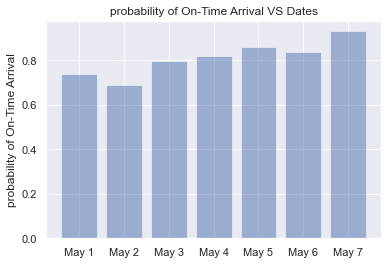

In [30]:
labels = ('May 1', 'May 2', 'May 3', 'May 4', 'May 5', 'May 6', 'May 7')
values = (predict_delay('1/5/2018' ' 21:45:00', 'JFK', 'MSP'),
          predict_delay('2/5/2018' ' 21:45:00', 'JFK', 'MSP'),
          predict_delay('3/5/2018' ' 21:45:00', 'JFK', 'MSP'),
          predict_delay('4/5/2018' ' 21:45:00', 'JFK', 'MSP'),
          predict_delay('5/5/2018' ' 21:45:00', 'JFK', 'MSP'),
          predict_delay('6/5/2018' ' 21:45:00', 'JFK', 'MSP'),
          predict_delay('7/5/2018' ' 21:45:00', 'JFK', 'MSP'),)
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha = 0.5)
plt.xticks(alabels, labels)
plt.ylabel('probability of On-Time Arrival')
plt.title('probability of On-Time Arrival VS Dates')
plt.show()